# Tutorial: Vibration Energy Harvesting

In this tutorial, you will simulate energy harvesting using an harmonic oscillator. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import fftpack, signal
%matplotlib nbagg

## Mechanical harmonic oscillator

Your task is to maximize the power harvested by the harmonic oscillator that is described if the following equation:

$$
\ddot x + \dfrac{h}{m} \dot x + \dfrac{k}{m} x = -\ddot x_d
$$

Where:

* $x$ is the position,
* $\dot x$ and $\ddot x$ are respectively the speed and acceleration,
* $m = 15$ g is the mass and is fixed,
* $h$ the harvesting term (can be tuned),
* $k$ the stiffness (can be tuned),
* and $\ddot x_d$ the driving acceleration which is null if the oscillator is free.

In the following we will use the canonical form of the equation which is defined by :

$$\ddot{x} + 2 \zeta \omega_0 \dot x + \omega_0^2 x = -\ddot{x_d}$$


* $\zeta = \displaystyle \frac{h}{2 \sqrt{k m}}$ the harvesting term (can be tuned),
* $\omega_0$ the pulsation (can be tuned),

## Ambient excitation

we suppose that the ambiant acceleration $\ddot x_d$ correponds to a sinusoidal excitation :

$$\ddot x_d(t) = A \ sin(\omega_d t)$$


Where $A$ is the amplitude and $\omega_d$ is the excitation's pulsation.

### Task 1 : Coding a specific excitation 
First, define an excitation function. Check it with a plot. 

### Task 2 : Coding the harmonic oscillator

Use your work from example #4 to code the harmonic oscillator and simulate it using the ambient acceleration defined above.

You could take $\zeta = 0.1$, and $\omega_0 = 2 \pi$ for example.

### Task 3 : Energy calculation

Compute kinetic energy $E_c$ and elastic energy $E_k$. You must define methods.
Plot it.

### Task 4 : Harvested power expression

Find the equation that controls the power $P_h$ that is harvested by the oscillator. Plot it. Calculate the associate energy $E_h$.

### Task 5 : Measure the harvested power 

For a given configuration of $\zeta$ and $\omega_0$, measure the power harvested by the oscillator. Calculate the  RMS value.

### Task 6 : Compute the harvested power as a function of $\zeta$ and $\omega_0$

Test multiple combinations of $\zeta$ and $\omega_0$ and find which one is the best. You can compare your results with your colleagues.

## Bonus : Testing with more complex excitations (more real)

### Noise-type ambient acceleration 

We assume that the ambient acceleration available to our device is reproduced by the following function.

In [2]:
def noise(N = 1000, D = 10.):
    """
    Noise generator.
    
    Inputs:
    * N: number of samples.
    * D: signal duration.
    """
    N = int(N)
    dt = D / (N-1)
    t = np.linspace(0., D, N)
    a = np.random.rand(N)
    a -= a.mean()
    A = fftpack.fft(a)
    F = fftpack.fftfreq(N, dt)
    win = fftpack.fftshift(signal.gaussian(N, std=N/10))
    A *= win
    a2 = fftpack.ifft(A)
    return t, np.real(a2), A[:N//2], F[:N//2]

In [ ]:
# generate the ambient acceleration
t, a, A, F = noise()

<IPython.core.display.Javascript object>


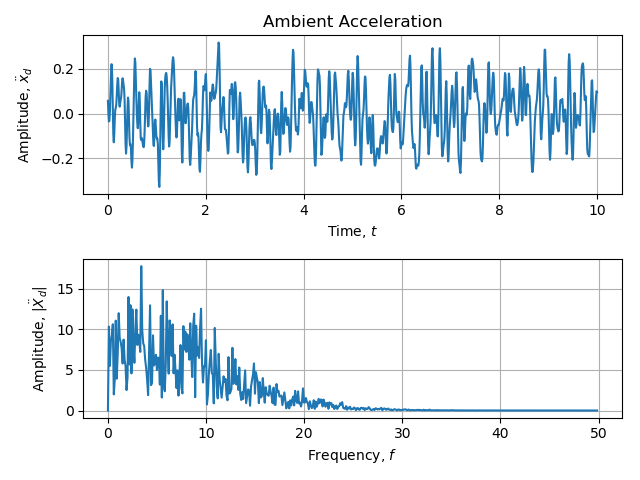

In [4]:
# plot it
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
plt.title("Ambient Acceleration")
plt.plot(t, a)
plt.grid()
plt.xlabel("Time, $t$")
plt.ylabel(r"Amplitude, $\ddot x_d$")
ax = fig.add_subplot(2,1,2)
plt.plot(F, abs(A))
plt.grid()
plt.xlabel("Frequency, $f$")
plt.ylabel(r"Amplitude, $|\ddot X_d|$")
plt.tight_layout()
plt.show();

Define a time discretization on $[0,5]$ and interpolate the white noise excitation defined above in order to simulate the perturbed oscillator. Use the `interp1d` method (see the scipy doc). Plot the excitation and the numerical solution obtained with `odeint`.

### Excitation windowed by a triangular function

Now we want to window the sinusoidal excitation signal over a period $D = 10$ s of simulation. For this we will use a triangular function with compact support equal to the time interval $I = [0, D]$ and centered on. This windowing function is defined by : 


$$\operatorname{Tri}_{[0, D]}(t) = \left\{ \begin{array}{ll} \displaystyle 1 - \frac{|t - m|}{m} \qquad \text{if} \ |t - m| \leq 1\\
									 0 \qquad \qquad \qquad \text{otherwise} \end{array} \right.$$
                                     
Which can also be written more concisely as : 

$$\operatorname{Tri}_{[0, D]}(t) = \max\left(1 - \frac{|t - m|}{m}, 0\right)$$

Where $m$ corresponds to the middle of the time interval $I = [0, D]$


The excitation expression is :  
$$\text{For all} \ t \in I, \qquad x_d(t) = \operatorname{Tri}_{[0, D]}\left(\displaystyle t\right) \sin(\omega_d t)$$





Do the same with this windowed excitation signal